<h1 align="center">Interactive Linguistic Essay</h1>


Welcome to my **interactive linguistic essay**! In this project, I’ll do a basic linguistic analysis of the bilingual English/French lyrics of the song **Fever** by *Dua Lipa* and *Angèle*, using **Python** and `BeautifulSoup`, `spaCy` (for multilingual processing), `TextBlob`, `WordCloud` and `Matplotlib` librairies.

1. To start the analysis, I first needed to get the song lyrics. I chose KKBOX, a music streaming platform that hosts official lyrics and allows scraping. Using Python with the `requests` and `BeautifulSoup` libraries, I pulled the lyrics directly from the song’s KKBOX page:

In [5]:
import requests
page = requests.get("https://www.kkbox.com/sg/en/song/XaTfAqeriLniKOkLXT")

In [6]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

2. Now that I’ve created a BeautifulSoup object from the webpage’s HTML, I can collect each line of the song lyrics, which are inside `<p>` tags, and extract the text:

In [8]:
paras = soup.find_all("p")


3. Using a `for` loop, I extract only the text (removing any HTML tags) and store the cleaned lines of lyrics in a list:


In [9]:
for el in paras:
   text = el.getText().strip()
   
print(text)


Before you came around, I was doing just fine
Usually, usually, usually, I don't pay no mind
And when it came down, I was looking in your eyes
Suddenly, suddenly, suddenly, I could feel it inside
I've got a fever, so can you check?
Hand on my forehead, kiss my neck
And when you touch me, baby, I turn red
I've got a fever, so can you check?
Peut-être qu'avec du temps, ça partira
Et pourtant, et pourtant, et pourtant, je ne m'y vois pas
Comme un médicament, moi, je suis rien sans toi
Et je sais que j'essaye, que je perds du temps dans tes bras
I've got a fever, so can you check?
Hand on my forehead, kiss my neck
And when you touch me, baby, I turn red
I've got a fever, so can you check?
Car dans mes yeux, ça se voit
La fièvre dans les yeux, oui ça se voit
Mon cœur se serre, j'ai du feu dans la voix
Le plus souvent, c'est quand je pense à toi
I've got a fever, can you check?
Hand on my forehead, kiss my neck
And when you touch me, baby, I turn red
I've got a fever, so can you check?
Tell 

4. After cleaning the lyrics into a string formats, I use automatic language detection with `langdetect` to check whether each line is in English or French. Then, I split them into two separate lists (this helps prepare the lyrics for further analysis with spaCy’s language models):


In [10]:
from langdetect import detect

english_lines = []
french_lines = []

lines = text.split('\n')

for line in lines:
    try:
        lang = detect(line)
    except:
        lang = "unknown"
    
    if lang == 'en':
        english_lines.append(line)
    elif lang == 'fr':
        french_lines.append(line)
    else:
        pass

english_lyrics = '\n'.join(english_lines)
french_lyrics = '\n'.join(french_lines)

print("English lyrics:\n", english_lyrics)
print("\n French lyrics:\n", french_lyrics)



English lyrics:
 Before you came around, I was doing just fine
Usually, usually, usually, I don't pay no mind
And when it came down, I was looking in your eyes
Suddenly, suddenly, suddenly, I could feel it inside
I've got a fever, so can you check?
Hand on my forehead, kiss my neck
And when you touch me, baby, I turn red
I've got a fever, so can you check?
I've got a fever, so can you check?
Hand on my forehead, kiss my neck
And when you touch me, baby, I turn red
I've got a fever, so can you check?
I've got a fever, can you check?
Hand on my forehead, kiss my neck
And when you touch me, baby, I turn red
I've got a fever, so can you check?
Tell me what you wanna do right now
Tell me what you wanna do right now
Tell me what you wanna do right now
'Cause I don't really wanna cool it down
Tell me what you wanna do right now
Tell me what you wanna do right now
Tell me what you wanna do right now
'Cause I don't really wanna cool it down

 French lyrics:
 Peut-être qu'avec du temps, ça parti

5. I load spaCy’s large language models for English and French (`en_core_web_lg` and `fr_core_news_lg`). Then, I process the English and French lyrics separately with these models to break the text into tokens. Finally, I collect all tokens from each language and print them out:


In [11]:
import spacy

nlp_en = spacy.load("en_core_web_lg")
nlp_fr = spacy.load("fr_core_news_lg")


doc_en = nlp_en(english_lyrics)
english_tokens = [token.text for token in doc_en]


doc_fr = nlp_fr(french_lyrics)
french_tokens = [token.text for token in doc_fr]


print("English tokens:", english_tokens)
print("French tokens:", french_tokens)


English tokens: ['Before', 'you', 'came', 'around', ',', 'I', 'was', 'doing', 'just', 'fine', '\n', 'Usually', ',', 'usually', ',', 'usually', ',', 'I', 'do', "n't", 'pay', 'no', 'mind', '\n', 'And', 'when', 'it', 'came', 'down', ',', 'I', 'was', 'looking', 'in', 'your', 'eyes', '\n', 'Suddenly', ',', 'suddenly', ',', 'suddenly', ',', 'I', 'could', 'feel', 'it', 'inside', '\n', 'I', "'ve", 'got', 'a', 'fever', ',', 'so', 'can', 'you', 'check', '?', '\n', 'Hand', 'on', 'my', 'forehead', ',', 'kiss', 'my', 'neck', '\n', 'And', 'when', 'you', 'touch', 'me', ',', 'baby', ',', 'I', 'turn', 'red', '\n', 'I', "'ve", 'got', 'a', 'fever', ',', 'so', 'can', 'you', 'check', '?', '\n', 'I', "'ve", 'got', 'a', 'fever', ',', 'so', 'can', 'you', 'check', '?', '\n', 'Hand', 'on', 'my', 'forehead', ',', 'kiss', 'my', 'neck', '\n', 'And', 'when', 'you', 'touch', 'me', ',', 'baby', ',', 'I', 'turn', 'red', '\n', 'I', "'ve", 'got', 'a', 'fever', ',', 'so', 'can', 'you', 'check', '?', '\n', 'I', "'ve", 'go

6. I use spaCy to analyze the text and get the part-of-speech (POS) tag for every word. I save all these word-POS pairs in a list. I do the same for the French lines using the French model. At the end, I print both lists of POS-tagged words:


In [12]:
english_pos_tags = []
for line in english_lines:
    doc = nlp_en(line)
    english_pos_tags.extend([(token.text, token.pos_) for token in doc])

french_pos_tags = []
for line in french_lines:
    doc = nlp_fr(line)
    french_pos_tags.extend([(token.text, token.pos_) for token in doc])

print(english_pos_tags)
print(french_pos_tags)


[('Before', 'SCONJ'), ('you', 'PRON'), ('came', 'VERB'), ('around', 'ADV'), (',', 'PUNCT'), ('I', 'PRON'), ('was', 'AUX'), ('doing', 'VERB'), ('just', 'ADV'), ('fine', 'NOUN'), ('Usually', 'ADV'), (',', 'PUNCT'), ('usually', 'ADV'), (',', 'PUNCT'), ('usually', 'ADV'), (',', 'PUNCT'), ('I', 'PRON'), ('do', 'AUX'), ("n't", 'PART'), ('pay', 'VERB'), ('no', 'DET'), ('mind', 'NOUN'), ('And', 'CCONJ'), ('when', 'SCONJ'), ('it', 'PRON'), ('came', 'VERB'), ('down', 'ADP'), (',', 'PUNCT'), ('I', 'PRON'), ('was', 'AUX'), ('looking', 'VERB'), ('in', 'ADP'), ('your', 'PRON'), ('eyes', 'NOUN'), ('Suddenly', 'ADV'), (',', 'PUNCT'), ('suddenly', 'ADV'), (',', 'PUNCT'), ('suddenly', 'ADV'), (',', 'PUNCT'), ('I', 'PRON'), ('could', 'AUX'), ('feel', 'VERB'), ('it', 'PRON'), ('inside', 'ADV'), ('I', 'PRON'), ("'ve", 'AUX'), ('got', 'VERB'), ('a', 'DET'), ('fever', 'NOUN'), (',', 'PUNCT'), ('so', 'ADV'), ('can', 'AUX'), ('you', 'PRON'), ('check', 'VERB'), ('?', 'PUNCT'), ('Hand', 'NOUN'), ('on', 'ADP'), (

7. Now that I’ve tagged every word in the lyrics with its part of speech, I use this loop to count how often each POS tag appears (this helps me understand the grammar and structure of the song):


In [13]:
from collections import Counter

counter_en = Counter()
for token, pos_tag in english_pos_tags:
    counter_en[pos_tag] += 1

print("English POS tag counts:")
print(counter_en)

counter_fr = Counter()
for token, pos_tag in french_pos_tags:
    counter_fr[pos_tag] += 1

print("\nFrench POS tag counts:")
print(counter_fr)


English POS tag counts:
Counter({'PRON': 57, 'VERB': 43, 'PUNCT': 29, 'ADV': 28, 'AUX': 24, 'NOUN': 21, 'SCONJ': 7, 'DET': 7, 'ADP': 7, 'CCONJ': 4, 'PART': 3, 'ADJ': 3})

French POS tag counts:
Counter({'PRON': 28, 'NOUN': 17, 'ADP': 16, 'PUNCT': 15, 'VERB': 15, 'ADV': 14, 'DET': 14, 'CCONJ': 6, 'SCONJ': 5, 'AUX': 3})


8. I use this code to create bar charts showing the percentage of each part-of-speech (POS) tag in the English and French lyrics. It counts how often each POS tag appears, then plots the results with labels to make it easy to see which types of words are most common in each language:


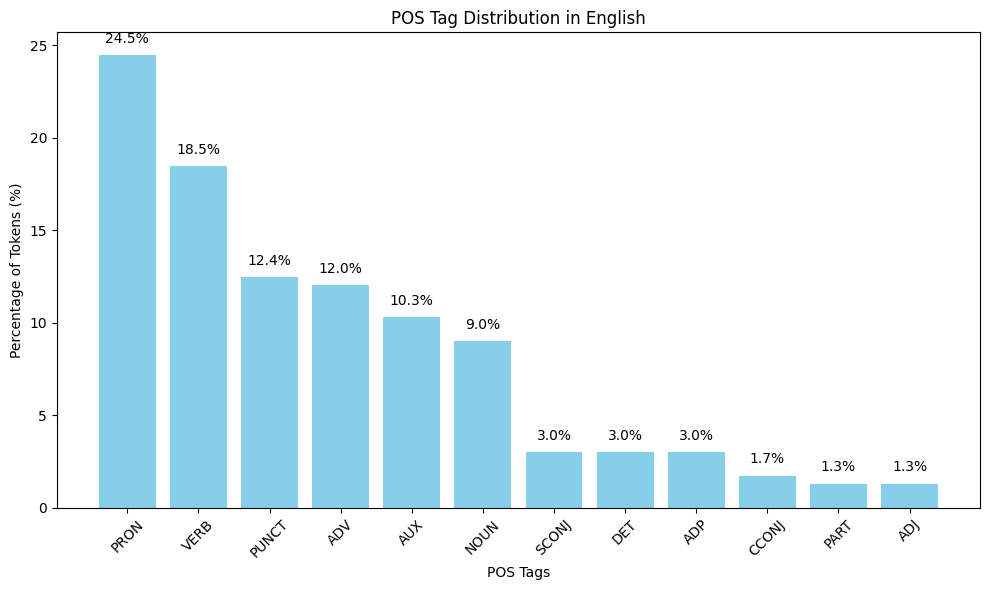

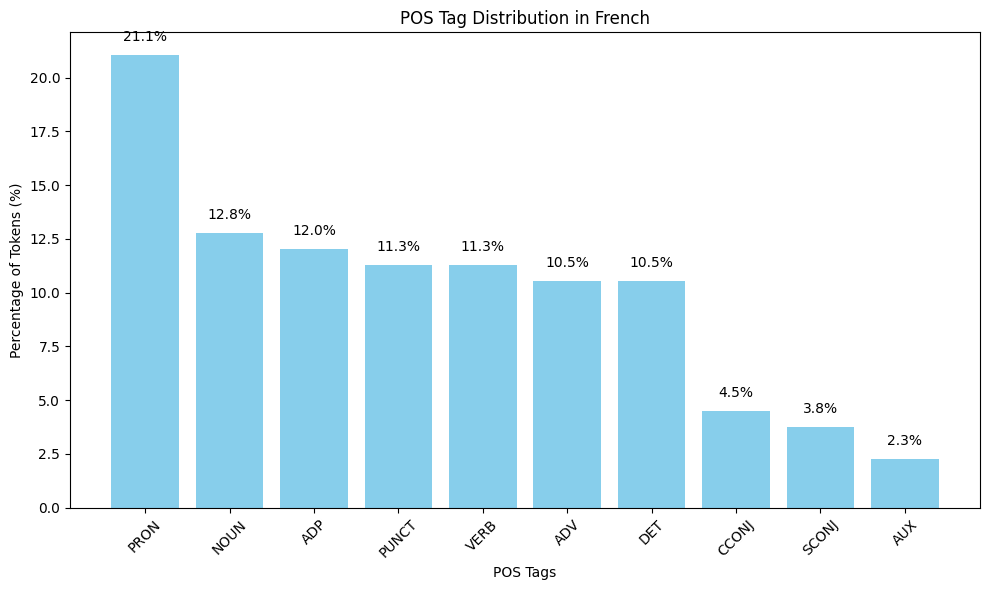

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_pos_distribution(pos_tag_list, language_name="Language"):
    pos_counts = Counter(pos_tag for token, pos_tag in pos_tag_list)
    total_tokens = sum(pos_counts.values())

    tags, counts = zip(*pos_counts.most_common())
    
   
    percentages = [count / total_tokens * 100 for count in counts]
    
    plt.figure(figsize=(10,6))
    bars = plt.bar(tags, percentages, color='skyblue')
    plt.xlabel('POS Tags')
    plt.ylabel('Percentage of Tokens (%)')
    plt.title(f'POS Tag Distribution in {language_name}')
    plt.xticks(rotation=45)
    
   
    for bar, pct in zip(bars, percentages):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{pct:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()


plot_pos_distribution(english_pos_tags, "English")

plot_pos_distribution(french_pos_tags, "French")


9. This code gives insigths into statistics of the lyrics. It shows the total number of words, the count and percentage of each POS tag, and the top 5 most common tags for both English and French:


In [15]:
from collections import Counter

def pos_statistics(pos_tag_list, language_name="Language"):
    total_tokens = len(pos_tag_list)
    print(f"Total tokens in {language_name}: {total_tokens}")

    pos_counts = Counter(pos_tag for token, pos_tag in pos_tag_list)
    print(f"\nPOS tag counts in {language_name}:")
    for tag, count in pos_counts.most_common():
        percent = (count / total_tokens) * 100
        print(f"{tag}: {count} ({percent:.2f}%)")

    print(f"\nTop 5 POS tags in {language_name}:")
    for tag, count in pos_counts.most_common(5):
        print(f"{tag}: {count}")

pos_statistics(english_pos_tags, "English")
print("\n-----------------------------\n")
pos_statistics(french_pos_tags, "French")


Total tokens in English: 233

POS tag counts in English:
PRON: 57 (24.46%)
VERB: 43 (18.45%)
PUNCT: 29 (12.45%)
ADV: 28 (12.02%)
AUX: 24 (10.30%)
NOUN: 21 (9.01%)
SCONJ: 7 (3.00%)
DET: 7 (3.00%)
ADP: 7 (3.00%)
CCONJ: 4 (1.72%)
PART: 3 (1.29%)
ADJ: 3 (1.29%)

Top 5 POS tags in English:
PRON: 57
VERB: 43
PUNCT: 29
ADV: 28
AUX: 24

-----------------------------

Total tokens in French: 133

POS tag counts in French:
PRON: 28 (21.05%)
NOUN: 17 (12.78%)
ADP: 16 (12.03%)
PUNCT: 15 (11.28%)
VERB: 15 (11.28%)
ADV: 14 (10.53%)
DET: 14 (10.53%)
CCONJ: 6 (4.51%)
SCONJ: 5 (3.76%)
AUX: 3 (2.26%)

Top 5 POS tags in French:
PRON: 28
NOUN: 17
ADP: 16
PUNCT: 15
VERB: 15


10. At the end, I run sentiment analysis on both the English and French lyrics using different libraries. For English, I use TextBlob’s built-in sentiment analyzer, while for French, I use textblob_fr, which has its own tools for French text. These libraries use different models, so the polarity and subjectivity scores may vary:

In [16]:
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer

english_text = "\n".join(english_lines)
french_text = "\n".join(french_lines)

english_blob = TextBlob(english_text)
english_sentiment = english_blob.sentiment  

french_blob = TextBlob(french_text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
french_sentiment = french_blob.sentiment 

print("English Sentiment: Polarity =", english_sentiment.polarity, "Subjectivity =", english_sentiment.subjectivity)
print("French Sentiment: Polarity =", french_sentiment[0], "Subjectivity =", french_sentiment[1])



English Sentiment: Polarity = 0.13233082706766916 Subjectivity = 0.3700501253132832
French Sentiment: Polarity = 0.08 Subjectivity = 0.05


11. To finish the project, I created a word cloud to visualize the most frequent words in the lyrics. I generated it using the `WordCloud` library and displayed it with `Matplotlib`:

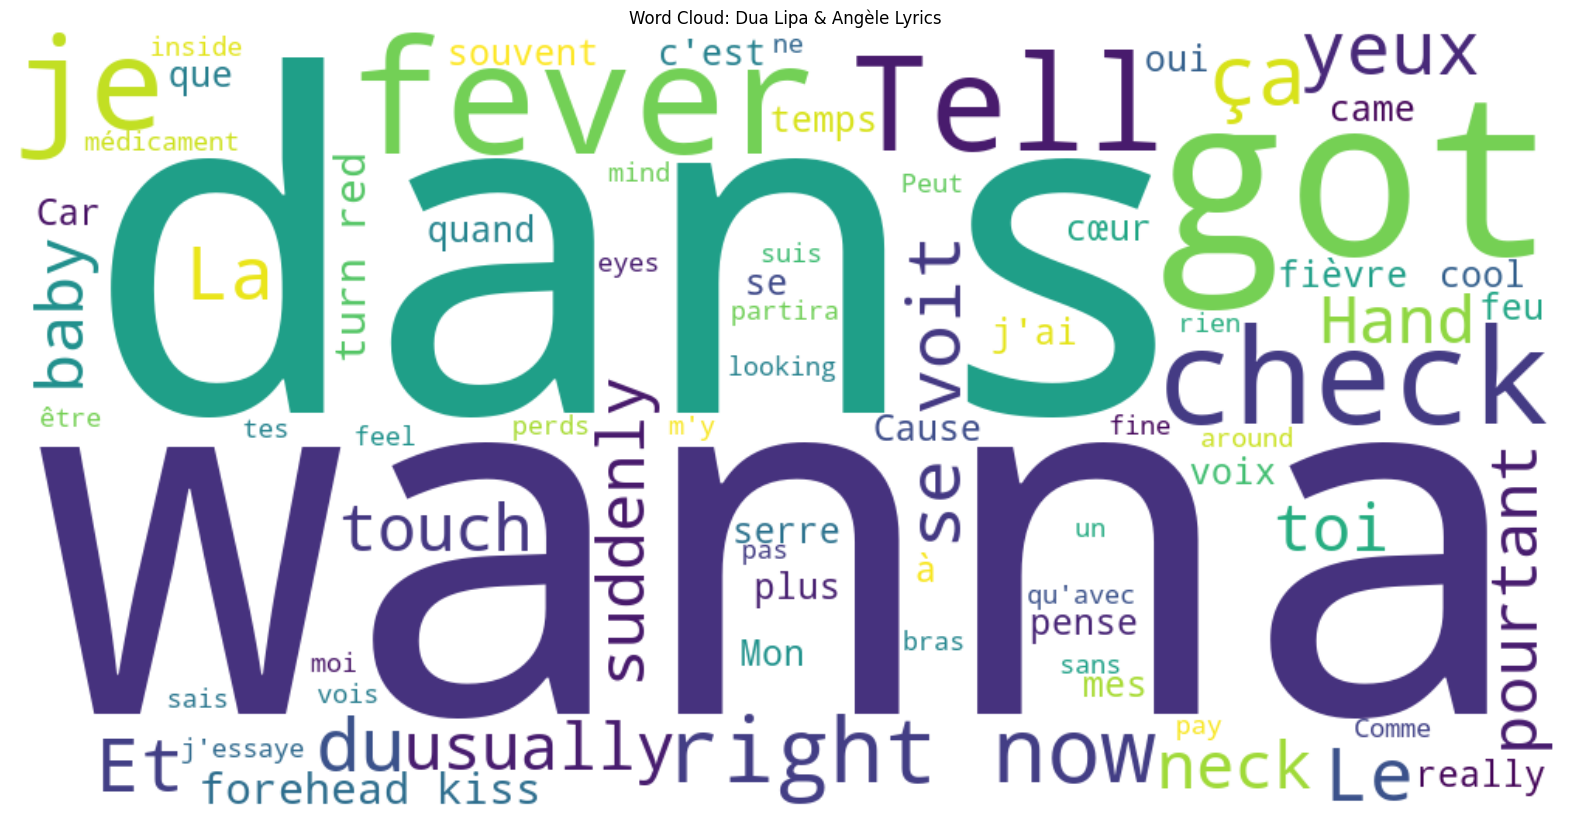

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

full_lyrics = english_lyrics + "\n" + french_lyrics


wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(full_lyrics)


plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud: Dua Lipa & Angèle Lyrics")
plt.show()
